<a href="https://colab.research.google.com/github/Sh-Dulguun/Dulguun.github.io/blob/master/Wheat_and_the_chessboard_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1
####Represent a chessboard with 2x2 squares as an ndarray and calculate the number of grains in each square. Place 1 wheat in the top left square, then 2 on the right, 4 on the bottom left, 8 on the bottom right, and so on.

In [ ]:
import numpy as np

In [ ]:
chessboard = np.zeros((2, 2), dtype=np.int64)
n_squares = 4
small_board_list = [1]
for i in range(n_squares - 1):
    small_board_list.append(2 * small_board_list[-1])
    row = i // 2
    col = i % 2
    chessboard[row][col] = small_board_list[i]
print("2x2 chessboard ndarray：\n", chessboard)

2x2 chessboard ndarray：
 [[1 2]
 [4 0]]


#Question 2
#### Create a function that returns an ndarray of wheat counts on an nxm chessboard. Then use this function to find the number of wheat on an 8x8 chessboard.

In [ ]:
def wheat_counts_on_chessboard(n, m):
    chessboard = np.zeros((n, m), dtype=np.int64)
    n_squares = n * m
    grains_list = [1]
    for i in range(n_squares - 1):
        grains_list.append(2 * grains_list[-1])
        row = i // m
        col = i % m
        chessboard[row][col] = grains_list[i]

    return chessboard
chessboard_8x8 = wheat_counts_on_chessboard(8, 8)
total_wheat = np.sum(chessboard_8x8)
print("Wheat on an 8x8 chessboard ：{}".format(total_wheat))

Wheat on an 8x8 chessboard ：9223372036854775807


# Question 3
#### Find the total number of wheat on an 8x8 chess board. Also find the average of each column and visualize it in a bar chart.

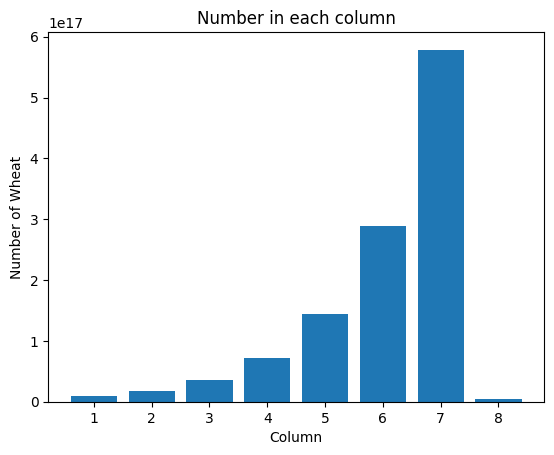

In [ ]:
import matplotlib.pyplot as plt
avg_wheat_per_column = np.mean(chessboard_8x8, axis=0)

plt.xlabel("Column")
plt.ylabel("Number of Wheat")
plt.title("Number in each column")
plt.bar(np.arange(1, 9), avg_wheat_per_column)
plt.show()

# Question 4
#### Visualize the number of wheat on an 8x8 square chessboard as a heatmap.Heatmap provides sample code.
####《Heatmap sample code》It is a heatmap of an array of 4 rows and 2 columns. Small values ​​are purple and large values ​​are yellow.

Wheat on an 8x8 chessboard ：9223372036854775807


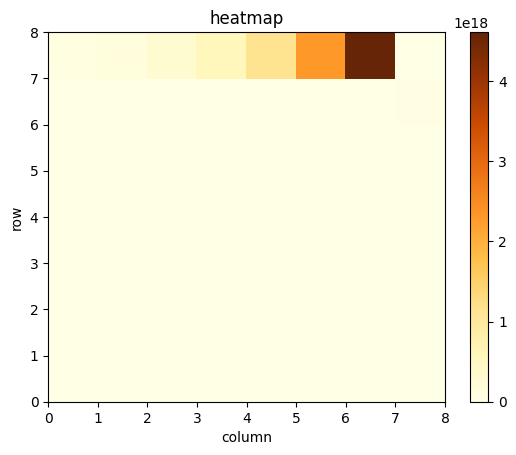

In [ ]:
def wheat_counts_on_chessboard(n, m):
    chessboard = np.zeros((n, m), dtype=np.int64)
    n_squares = n * m
    grains_list = [1]
    for i in range(n_squares - 1):
        grains_list.append(2 * grains_list[-1])
        row = i // m
        col = i % m
        chessboard[row][col] = grains_list[i]

    return chessboard
chessboard_8x8 = wheat_counts_on_chessboard(8, 8)
total_wheat = np.sum(chessboard_8x8)
print("Wheat on an 8x8 chessboard ：{}".format(total_wheat))

plt.xlabel("column")
plt.ylabel("row")
plt.title("heatmap")
plt.pcolor(chessboard_8x8, cmap='YlOrBr')
plt.colorbar()
plt.show()

# Question 5
#### Find the number of wheat in the second half of the chessboard multiplied by the number of wheat in the first half. The first half is rows 0 to 3 of the array, the second half is rows 4 to 7.

In [ ]:
def wheat_counts_on_chessboard(n, m):
    chessboard = np.zeros((n, m), dtype=np.int64)
    n_squares = n * m
    grains_list = [1]
    for i in range(n_squares - 1):
        grains_list.append(2 * grains_list[-1])
        row = i // m
        col = i % m
        chessboard[row][col] = grains_list[i]

    return chessboard
chessboard_8x8 = wheat_counts_on_chessboard(8, 8)

# Find the number of wheat in the first half of the chessboard
wheat_first_half = np.sum(chessboard_8x8[:4, :])

# Find the number of wheat in the second half of the chessboard
wheat_second_half = np.sum(chessboard_8x8[4:, :])

print("The number of wheat in the first half of the chessboard is:", wheat_first_half)
print("The number of wheat in the second half of the chessboard is:", wheat_second_half)

The number of wheat in the first half of the chessboard is: 4294967295
The number of wheat in the second half of the chessboard is: 9223372032559808512


#Problem 6
#### np.append()Create a new `` function that returns an ndarray that describes the number of wheat on an n x m square chessboard'' similar to Problem 2, one that uses and one that uses broadcasting.Use those functions to find again the number of wheat on the 8x8 square chessboard.

In [ ]:
def calc_wheat_on_board(n, m):
    board = np.array([1])
    for _ in range(n * m - 1):
        board = np.append(board, 2 * board[-1])
    return board.reshape(n, m)
def calc_wheat_on_board_broadcasting(n, m):
    indices = np.arange(n * m).reshape(n, m)
    board = 2 ** indices
    return board.astype(np.uint64)
board = calc_wheat_on_board(8, 8)
print("Total wheat on 8x8 chessboard using np.append():", board.sum())

board_broadcasting = calc_wheat_on_board_broadcasting(8, 8)
print("Total wheat on 8x8 chessboard using broadcasting:", board_broadcasting.sum())


Total wheat on 8x8 chessboard using np.append(): -1
Total wheat on 8x8 chessboard using broadcasting: 18446744073709551615


<ipython-input-64-51f32199f6ba>:4: RuntimeWarning: overflow encountered in long_scalars
  board = np.append(board, 2 * board[-1])


#Question 7
####I've seen 3 different methods. Please measure each calculation time %%timeitusing Jupyter Notebook and compare and discuss.
####%%timeitworks by executing the code in the cell multiple times and printing its average execution time.

In [ ]:
def wheat_counts_for_loop(rows, cols):
    chessboard_list = [1]
    for i in range(1, rows*cols):
        chessboard_list.append(2*chessboard_list[-1])
    return np.array(chessboard_list).reshape(rows, cols)
rows, cols = 8, 8
%timeit wheat_counts_for_loop(rows, cols)
def wheat_counts_np_append(rows, cols):
    powers_of_two = np.array([1])
    for i in range(1, rows*cols):
        powers_of_two = np.append(powers_of_two, 2*powers_of_two[-1])
    return powers_of_two.reshape(rows, cols)
%timeit wheat_counts_np_append(rows, cols)

15.4 µs ± 659 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


<ipython-input-62-470a9c3334c6>:11: RuntimeWarning: overflow encountered in long_scalars
  powers_of_two = np.append(powers_of_two, 2*powers_of_two[-1])


371 µs ± 32.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
